In [63]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as st
import seaborn as sns

In [2]:
unis = pd.read_csv("./Estadística/uk_universities.csv")
unis.head()

,University_name,Region,Founded_year,Motto,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),...,Student_satisfaction,Student_enrollment,Academic_staff,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude,Website
0,University of Cambridge,East of England,1209,"From here, light and sacred draughts",1,4,94.1,6.5,21750,23187,...,85.50%,"20,000-24,999","over-5,000",Public,Trimesters,Urban,12000,52.2054,0.1132,www.cam.ac.uk
1,University of Oxford,South East England,1096,The Lord is my light,2,2,93.3,6.5,21770,19888,...,86.50%,"25,000-29,999","over-5,000",Public,Trimesters,Urban,11500,51.7548,-1.2544,www.ox.ac.uk
2,University of St Andrews,Scotland,1413,Ever to excel,3,86,75.8,6.5,17040,15440,...,87.90%,"10,000-14,999","1,000-1,499",Public,Semesters,Suburban,12000,56.3417,-2.7943,www.st-andrews.ac.uk
3,Imperial College London,London,1907,Knowledge is the adornment and safeguard of th...,4,8,86.6,6.5,23500,29900,...,77.90%,"15,000-19,999","4,000-4,499",Public,Continuous,Urban,10700,51.4988,-0.1749,www.ic.ac.uk
4,Loughborough University,East Midlands,1966,"With Truth, Knowledge and Labour",5,404,72.8,5.5,16400,16400,...,85.80%,"15,000-19,999","1,500-1,999",Public,Semesters,Suburban,9398,52.7650,-1.2321,www.lboro.ac.uk/


In [3]:
# Ejercicio 1 Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
# Tabla de contingencia
# Coeficiente de correlación de las variables numéricas del dataset.
# Sesgos de alguna de las variables numéricas del dataset.
# Intervalo de confianza de algunas de las variables numéricas del dataset

In [4]:
# Cruzamos tipos de campus con las regiones donde están.

cross_tab = pd.crosstab(unis["Region"],unis["Campus_setting"])
cross_tab

Campus_setting,Rural,Suburban,Urban
Region,,,
East Midlands,0,4,2
East of England,0,3,6
London,0,4,15
North East England,1,0,5
North West England,1,1,7
Northern Ireland,0,0,2
Scotland,0,5,9
South East England,1,7,5
South West England,2,4,2


Podemos observar que la capital, como cabía esperar, no tiene campus en zonas rurales. Las regiones con mayor número de campus rurales están situadas en el suroeste de UK, entre Wales y South West England. 
Scotland y Londres agrupan la mayor cantidad de universidades urbanas. Llama la atención que en Northern Ireland y Scotland, no hay campus rurales, pero suponemos que por ser zonas de poca población y difícil acceso.

In [5]:
# Queremos estudiar la relación entre la satisfacción del estudiante con lo que ha pagado. np.corrcoef

In [10]:
def convertir(x):
    x = float(x.replace("%", "")) / 100
    return x

In [11]:
unis["porcentaje"] = unis["Student_satisfaction"].apply(convertir)

In [14]:
matriz_corr = np.corrcoef(unis["porcentaje"],unis["UG_average_fees_(in_pounds)"])
matriz_corr

array([[1.        , 0.02483463],
       [0.02483463, 1.        ]])

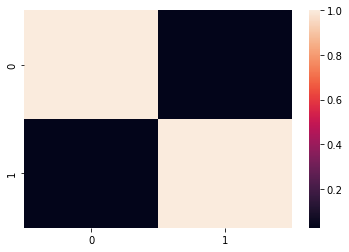

In [64]:
plt.figure()
sns.heatmap(matriz_corr)
plt.show()

Hay poca correlación entre el precio de las tarifas y la satisfacción de los estudiantes. No por ser una universidad más cara, el alumandno está más contento. La satisfacción se encuentra en otros factores.

In [58]:
# Estudiamso el sesgo con la variable numérica año de fundación

skewness = skew(unis["Founded_year"])
print(skewness)

-3.7071540335573236


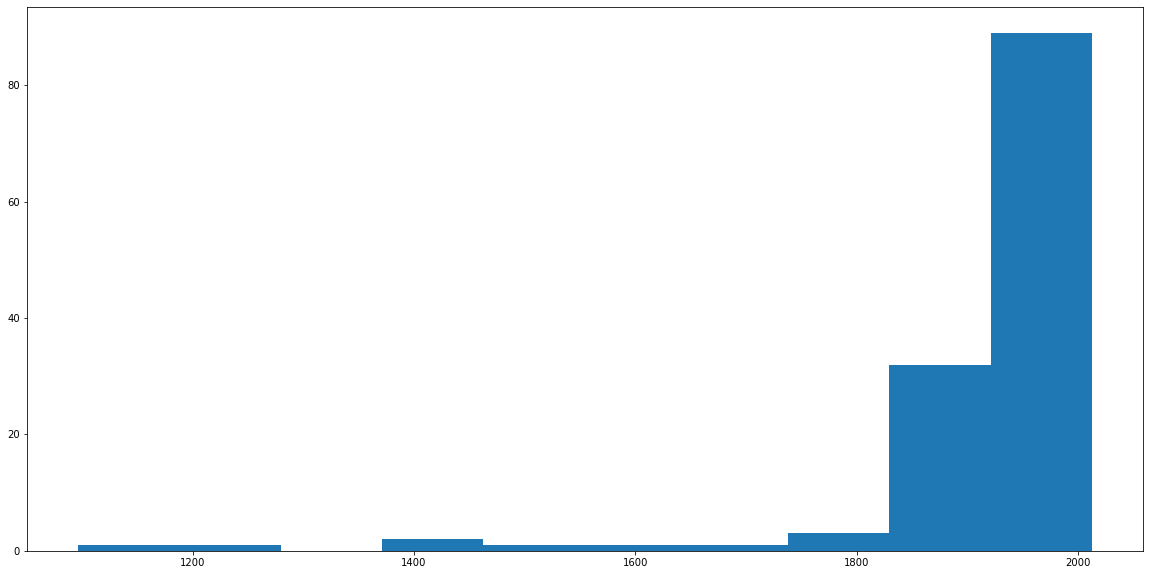

In [59]:
plt.figure(figsize=(20,10))
plt.hist(unis["Founded_year"])
plt.show()

Es una gráfica con un sesgo a la izquierda porque aunque la fundación de la mayor parte de las universidades es de los dos últimos siglos, UK tiene universidades muy antiguas como Oxford.

In [ ]:
# Aportamos el histograma "manual" con los intervalos, no podemos hacer el skew porque al hacer intervalos tenemos variables categóricas

In [18]:
fundacion = unis.groupby("Founded_year")
frecuencia_fundacion = fundacion.agg(frecuencia = ("Founded_year","count")).reset_index()

In [21]:
bins = [1000,1100,1200, 1300, 1400, 1500, 1600, 1700, 1800,1900,2000,2100] # intervalos correspondientes a los siglos

frecuencia_fundacion["group"] = pd.cut(unis["Founded_year"], bins=bins) 

a = frecuencia_fundacion.groupby("group").agg(frecuencia=("Founded_year", "count")).reset_index()
a

,group,frecuencia
0,"(1000, 1100]",1
1,"(1100, 1200]",0
2,"(1200, 1300]",1
3,"(1300, 1400]",0
4,"(1400, 1500]",3
5,"(1500, 1600]",1
6,"(1600, 1700]",0
7,"(1700, 1800]",1
8,"(1800, 1900]",17
9,"(1900, 2000]",41


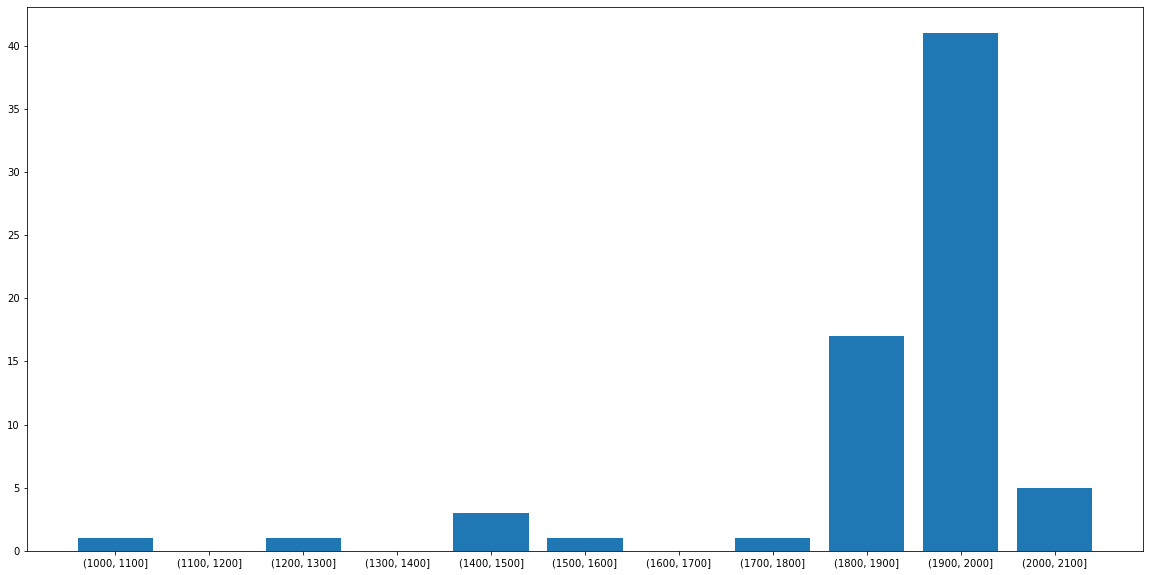

In [38]:
plt.figure(figsize=(20,10))
x = a["group"].apply(str)
y = a["frecuencia"]
plt.bar(x,y)
plt.show()

El histograma nos muestra la cola hacia la izquierda, el centro de gravedad hacia la derecha.

In [ ]:
# Intervalo de confianza de algunas de las variables numéricas del dataset

In [52]:
# Queremos realizar el calculo del intervalo de confianza para el costo de vida por año
data = unis['Estimated_cost_of_living_per_year_(in_pounds)']

# Utilizamos Scipy para calcular el intervalo de confianza del 90% de la media de los datos.
# Dicho intervalo nos indica donde está la media del coste estimado al año con un 90 de probabilidad.
print(st.t.interval(alpha=0.90, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento
print(np.mean(data))

(8416.176449349416, 8873.289199505547)
8644.732824427481


El intervalo de confianza para el coste estimado en un año, está entre 8400 y 8900 libras. Fuera de ese intervalo, consideramos que son ciudades extremadamente caras para vivir.